# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, attention to detail, coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files & a rink template for scatter plots. One data file has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xG) to be merged onto shot attempts for this game. **If an xG value does not correspond to a shot event, it should not be counted**

- X and Y Coordinates are in feet and are adjusted such that both teams attack from left (dz) to right (oz)
    - X values range from -100 (end boards behind the DZ net) to 0 (centre ice) and 100 (end boards behind the OZ net)
    - Y values range from -42.5 (west side boards) to 0 (centre ice) and 42.5 (east side boards)
    - **When creating scatter plots, please use these coordinates along with the provided rink_template to display the full rink**

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

- Compiledgametime is in seconds, periods are 20 minutes long, except for overtime which is 5 minutes or less

Please show all work, **keep written answers succinct and to the point** and most of all, thanks for your time and good luck!

In [1]:
import pandas as pd

df = pd.read_csv('Data/DA_Tutorial_24.csv')
df_xg = pd.read_csv('Data/DA_Tutorial_24_xg.csv')

import numpy as np

import warnings

In [2]:
from matplotlib import pyplot as plt

image = plt.imread('Data/rink_template.png')

In [3]:
def period(time):
    time = time/60
    if time <= 20:
        return "First Period"
    elif time <= 40:
        return "Second Period"
    elif time <= 60:
        return "Third Period"
    else:
        return "Overtime"

df['period'] = df['compiledgametime'].apply(period)

## Q1) 
### a) Which teamid won the game, what was the score, which period was the winning goal scored in?
### b) Limited to the period where the winning goal was scored, create a scatter plot for the winning team's shot attempts in that period and highlight the winning goal in a different colour.

## A1)
### a)Team 315 won the game. The score was 315 (4) - (3) 311. The winning goal was scored in Overtime
### b) Shown in the cell below

In [4]:
#Question 1a
team_group = df.groupby(['teamid'])
team_group['goal'].sum()

teamid
311    3
315    4
Name: goal, dtype: int64

In [5]:
#Question 1a
#Since they won 4-3, we know the winning goal was the 4th goal team 315 scored
filt = (df['teamid'] == 315) & (df['goal'] == 1)
temp = df[filt]
temp.sort_index() #So the winning goal is definitely at the bottom
win_goal = temp.index[-1]
temp.loc[win_goal, 'period']

'Overtime'

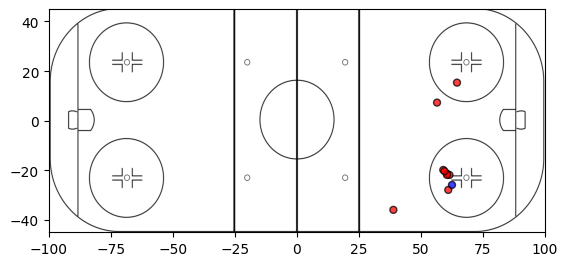

In [6]:
#Question 1b
win_x = temp.loc[win_goal, 'xadjcoord']
win_y = temp.loc[win_goal, 'yadjcoord']

filt = (df['teamid'] == 315) & (df['period'] == 'Overtime') & (df['eventname'] == 'shot')
temp1 = df[filt]
x = temp1['xadjcoord']
y = temp1['yadjcoord']
tolerance = 1e-6 
colors = np.where(((np.abs(x - win_x) < tolerance) & (np.abs(y - win_y) < tolerance)), 'blue', 'red')
fig, ax = plt.subplots()
ax.imshow(image, extent=[-100, 100, -45, 45]) 
plt.scatter(x, y, marker='o', color=colors, s=25, edgecolor='black', linewidth=1, alpha=0.75)

## Q2)

### a) Which playerid scored the winning goal? 
### b) Create a scatter plot for all of this player's powerplay shot attempts for the full game.
### c) If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? Please re-create the scatter plot accordingly.

## A2)
### a) Player 81408 scored the winning goal
### b) Shown Below
### c) You could multiply all y coordinates by -1 to make it appear from Ovi's Office

In [7]:
#Question 2a
temp.loc[win_goal, 'playerid']

81408

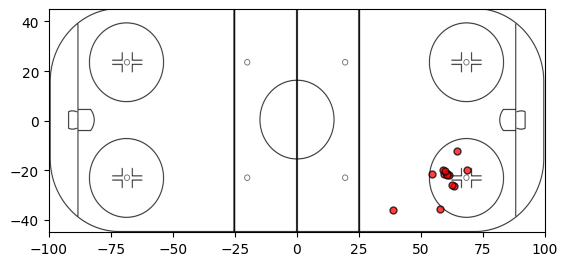

In [8]:
#Question 2b
filt = (df['playerid'] == 81408) & (df['manpowersituation'] == 'powerPlay') & (df['eventname'] == 'shot')
temp2 = df[filt]
x = temp2['xadjcoord']
y = temp2['yadjcoord']
fig, ax = plt.subplots()
ax.imshow(image, extent=[-100, 100, -45, 45]) 
plt.scatter(x, y, marker='o', color='red', s=25, edgecolor='black', linewidth=1, alpha=0.75)

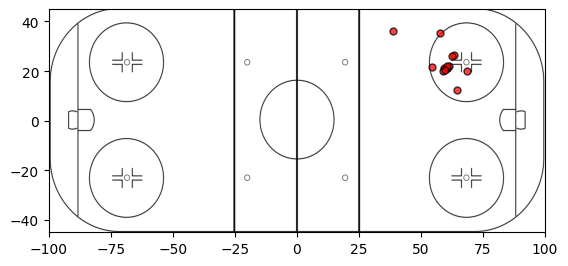

In [9]:
#Question 2c
x = temp2['xadjcoord']
y = temp2['yadjcoord'].apply(lambda x: x * (-1))
fig, ax = plt.subplots()
ax.imshow(image, extent=[-100, 100, -45, 45]) 
plt.scatter(x, y, marker='o', color='red', s=25, edgecolor='black', linewidth=1, alpha=0.75)

## Q3)
### a) The Assistant Coach wants to know how each team's even strength pass completion rate breaks down in each zone (please use the zone of pass origin). Build a simple visual to display this information for them in a clear and digestible way. 
### b) Which zone was more difficult to complete passes in at even strength, why do you think that is? 
### c) What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

## A3) 
### a) Shown Below
### b) The Offensive Zone. One team's offensive zone is the other team's defensive zones. This means when a team is attacking, they are susceptible to the pressure that the defenders are mounting on them to throw them off. Defensive zones also tend to be more crowded which means tighter angles, less freedom of movement, and more chances for opposition interception.
### c) Goalie 5152 has a slot save percentage of  96.428571% and Goalie 80264 has a slot save percentage of 92.857143%

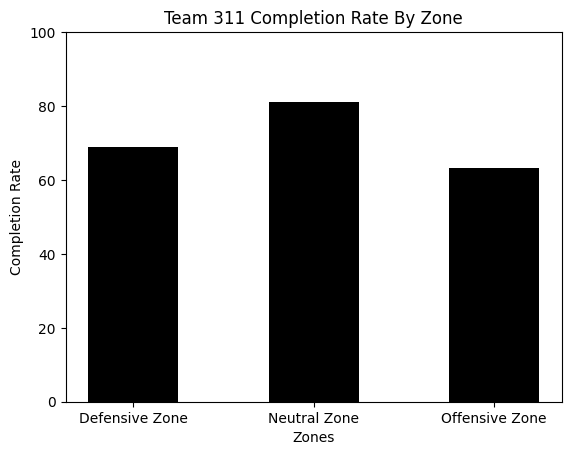

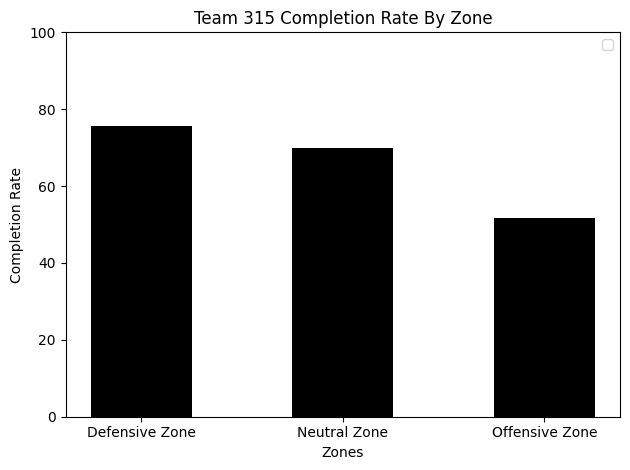

In [10]:
warnings.filterwarnings("ignore")

#Question 3a
#Team 311
filt1 = (df['manpowersituation'] == 'evenStrength') 
filt2 = (df['zone'] == 'dz')
filt3 = (df['zone'] == 'nz')
filt4 = (df['zone'] == 'oz')
filt5 = (df['eventname'] == 'pass')
filt6 = (df['outcome'] == 'successful')

temp = team_group.get_group(311)
team311 = temp[filt1 & filt5]

dz_311 = ((team311[filt2 & filt6]['eventname'].value_counts()) / (team311[filt2]['eventname'].value_counts()))*100
nz_311 = ((team311[filt3 & filt6]['eventname'].value_counts()) / (team311[filt3]['eventname'].value_counts()))*100
oz_311 = ((team311[filt4 & filt6]['eventname'].value_counts()) / (team311[filt4]['eventname'].value_counts()))*100

dz_311 = dz_311['pass']
nz_311 = nz_311['pass']
oz_311 = oz_311['pass']

zones = ('Defensive Zone', 'Neutral Zone', 'Offensive Zone')
percents = [dz_311, nz_311, oz_311]

plt.ylim(0, 100)
plt.bar(zones , percents, color = 'black', width = 0.5)

plt.title("Team 311 Completion Rate By Zone")
plt.ylabel("Completion Rate")
plt.xlabel("Zones")
plt.show()

#Team 315

temp = team_group.get_group(315)
team315 = temp[filt1 & filt5]

dz_315 = ((team315[filt2 & filt6]['eventname'].value_counts()) / (team315[filt2]['eventname'].value_counts()))*100
nz_315 = ((team315[filt3 & filt6]['eventname'].value_counts()) / (team315[filt3]['eventname'].value_counts()))*100
oz_315 = ((team315[filt4 & filt6]['eventname'].value_counts()) / (team315[filt4]['eventname'].value_counts()))*100

dz_315 = dz_315['pass']
nz_315 = nz_315['pass']
oz_315 = oz_315['pass']

zones = ('Defensive Zone', 'Neutral Zone', 'Offensive Zone')
percents = [dz_315, nz_315, oz_315]

plt.ylim(0, 100)
plt.bar(zones , percents, color = 'black', width = 0.5)

plt.title("Team 315 Completion Rate By Zone")
plt.ylabel("Completion Rate")
plt.xlabel("Zones")
plt.tight_layout()

plt.legend()

plt.show()

In [11]:
#Question 3c
filt1 = df['type'] == 'slot'
filt2 = (df['playsection'] == 'innerSlotDZ') | (df['playsection'] == 'innerSlot')  | (df['playsection'] == 'eastOuterSlotDZ') |( df['playsection'] == 'eastOuterSlot') | (df['playsection'] == 'westOuterSlotDZ') | (df['playsection'] == 'westOuterSlot')
filt3 = (filt1 | filt2)
filt4 = df['eventname'] == 'shot'

temp =df[filt3]
temp = temp[filt4]

goalie = temp.groupby(['opposingteamgoalieoniceid'])

goalie_80264 = goalie.get_group(80264)
save_80264 = ((goalie_80264['eventname'].value_counts() - goalie_80264['goal'].sum())/ goalie_80264['eventname'].value_counts()) * 100

goalie_5152 = goalie.get_group(5152)
save_5152 = ((goalie_5152['eventname'].value_counts() - goalie_5152['goal'].sum())/ goalie_5152['eventname'].value_counts()) * 100


## Q4)
### a) Assuming the centre of the net is at X=89 (goal line), Y=0 (centre ice), what was the average shot distance for each team for shots from the outside north west playsection to the centre of the net?

## A4)
### a) The avergae shot distance is 34.06263188389662 yard

In [12]:
#Question 4a
filt = (df['playsection'] == 'outsideNorthWest') & (df['eventname'] == 'shot')

temp = df[filt]

def distanceFromCenter(x,y):
    a = x-89
    a = a*a
    b = y*y
    return np.sqrt(a+b)
temp['distance'] = temp.apply(lambda row: distanceFromCenter(row['xadjcoord'], row['yadjcoord']), axis=1)

temp['distance'].mean()

34.06263188389662

## Q5)
### a) If a "Shot Assist" is defined as a sequence of events where there is: 1) a successful pass followed by 2) a successful reception by a *teammate* and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. How many shot attempts did playerid 7380 have that were assisted?
### b) For shots that were assisted, if the full xG value from the shot attempt was credited to the passer for their successful pass (shot assist), which passer created the most xG for their teammates?
### c) Plot a single diagram of this passer's shot assists (pass to reception) and their corresponding shots (reception to shot). Hint: Don't forget what you learned about plotting Y coordinates.

## A5)
### a) Technically, the answer is 0 because there is no playerid 7380. But, I assumed that it was meant to be 73980. For that, the answer is 4.
### b) Player ID 10534 provided created the most xG
### c) Shown Below

In [13]:
#Question 5a
def shotAssist(row):
    if (row['eventname'] == 'shot') and (row['outcome'] == 'successful'):
        prev = df.iloc[row.name - 1]
        if (prev['eventname'] == 'reception') and (prev['outcome'] == 'successful'):
            prev2 = df.iloc[row.name - 2]
            if (prev2['eventname'] == 'pass') and (prev2['outcome'] == 'successful') and (prev2['playerid'] != prev['playerid']):
                return True
    return False
    
df['shot_assist'] = df.apply(shotAssist, axis=1)
filt = (df['playerid'] == 79380) & (df['shot_assist'] == True)
df[filt]['shot_assist'].value_counts()

shot_assist
True    4
Name: count, dtype: int64

In [22]:
#Question 5b
def creditPasser(row):
    if (row['shot_assist'] == True):
        assister = row.name - 2
        temp.loc[assister, 'credited_xg'] += row['xg']
    return row

temp = df.join(df_xg.set_index('compiledgametime'), on='compiledgametime', validate='m:1', rsuffix='_xg')
temp['credited_xg'] = 0
for index, row in temp.iterrows():
    creditPasser(row)
temp1 = temp
temp1.groupby('playerid')['credited_xg'].sum().idxmax()

10534

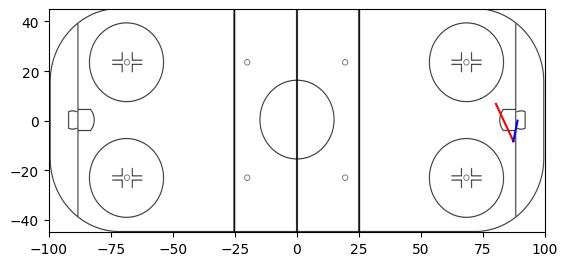

In [43]:
#Question 5c
fig, ax = plt.subplots()
ax.imshow(image, extent=[-100, 100, -45, 45]) 

def passReception(a,b):
    plt.plot(a, b, color='red')
def receptionShot(c, d):
    plt.plot(c, d, color='blue')
filt = (temp['playerid'] == 10534) & (temp['credited_xg'] > 0)

temp1 = temp[filt]
for index, row in temp1.iterrows():
    index = row.name
    index = index + 1
    shot_index = index + 1
    
    a = [row['xadjcoord'], df.loc[index,'xadjcoord']]
    b = [row['yadjcoord'], df.loc[index,'yadjcoord']]
    passReception(a,b)

    c = [df.loc[index,'xadjcoord'], 89]
    d = [df.loc[index,'yadjcoord'], 0]
    receptionShot(c,d)

## Q6)
### a) Which team won the xG battle and how much xG did each teamid have?
### b) Given who won the game, what does this tell you about how the game went?

## A6)
### a) Team 311 won the xG battle with Team 311 having a total xG of 5.153972 while Team 315 had a total xG of 4.099661
### b) There are many conclusions that can be made from this. However, if you look at the df I created for this question below (which shows the breakdown of xG by period), you will see that as the game progressed, team 315's xG started to surpass that of team 311 especially in the third period. This means that as the game progressed, team 315 started to make and take more opportunities when compared to team 311.

In [16]:
#Question 6a
temp = df.join(df_xg.set_index('compiledgametime'), on='compiledgametime', validate='m:1', rsuffix='_xg')
temp.groupby('teamid')['xg'].sum()

teamid
311    5.153972
315    4.099661
Name: xg, dtype: float64

In [17]:
#Question 6b
temp.groupby(['teamid', 'period'])['xg'].sum().reset_index()

,teamid,period,xg
0,311,First Period,2.237972
1,311,Overtime,0.000000
2,311,Second Period,1.921437
3,311,Third Period,0.994564
4,315,First Period,1.983885
5,315,Overtime,0.627475
6,315,Second Period,0.365198
7,315,Third Period,1.123104
